# Ajuste de modelos via cuadrados mínimos usando PyTorch

## Ejercicio 1)

Instale `pytorch` usando el comando de bash

In [ ]:
#pip install torch torchvision torchaudio torchviz


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached setuptools-75.5.0-py3-none-any.whl.metadata (6.8 kB)
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/203.0 MB 2.8 MB/s eta 0:01:12
   ---------------------------------------- 0.6/203.0 MB 5.8 MB/s eta 0:00:36
   ---------------------------------------- 1.6/203.0 MB 11.4 MB/s eta 0:00:18
    --------------------------------------- 3.0/203.0 MB 15.8 MB/s eta 0:00:13
    --------------------------------------- 4.3/203.0 MB 18.4 MB/s eta 0:00:11
    --------------------------------------- 4.6/203.0 MB 19.8 MB/s eta 0:00:11
    --------------------------------------- 4.6/203.0 MB 1

## Ejercicio 2)

**1)** Importe librerias `numpy`, `scipy` y `matplotlib`.

**2)** Importe librerias de `pytorch`.
Para ello, vea el colab `pytorch-tutorial-1-tensores.ipynb`.

In [2]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [3]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
#from torchviz import make_dot
import torch.optim as optim

## Ejercicio 3)

Considere una secuencia de mediciones $(x_i,y_i)$ con $i=1,...,m$ de una variable independiente $x$ y una variable dependiente $y$.

Considere un modelo

$$
y = f(x,w) = \exp(-w_0 x)\sin(w_1x)
$$

donde $w=(w_0,w_1)$ es el vector de los parámetros del modelo.

**1)** Use `np.linspace` para generar un vector de 20 valores de $x$ en $[0,3]$.

**2)** Con $w=(0.5,4)$, use los valores de $x$ para generar un vector de 30 valores de $y$, i.e. un vector de componentes $y_i = f(x_i,w)$.

**3)** Genere valores experimentales *sintéticos* agregando ruido al vector $y$ generado en **2)**, agregandole números aleatorios obtenidos de una distribución normal de media $0$ y desviación estandard $0.1$.

**4)** Grafique los datos *experimentales* usando puntos.
Simultaneamente, grafique la curva *exacta*, interpolando sobre 300 puntos en el mismo rango.

In [4]:
# 3.1)

w_exacta = [0.5, 4.0]
x_data = np.linspace(0, 3, 20)
y_data = np.exp(-w_exacta[0]*x_data)*np.sin(w_exacta[1]*x_data) + 0.1*np.random.normal(size=len(x_data))

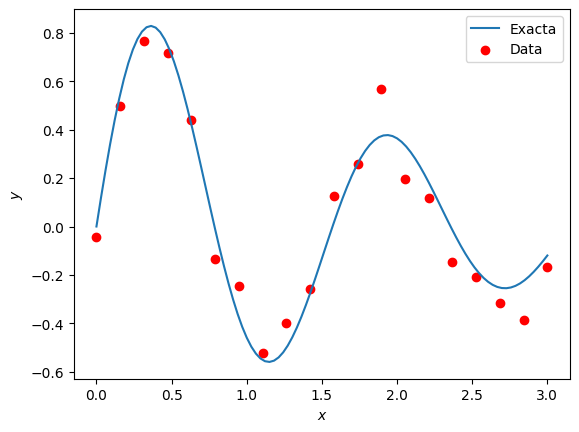

In [5]:
x_exacta = np.linspace(0, 3, 100)
y_exacta = np.exp(-w_exacta[0]*x_exacta)*np.sin(w_exacta[1]*x_exacta)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_exacta, y_exacta, label='Exacta')
plt.scatter(x_data, y_data, label='Data', c='r')
plt.legend()
plt.show()

## Ejercicio 4)

El ajuste de un modelo por cuadrados mínimos, consiste en encontrar el vector de parámetros que minimiza la suma de los cuadrados de las diferencias entre los datos y las predicciones del modelo.
Más precisamente, consiste en minimizar

$$
E(w) = \sum_i (f(x_i,w)-y_i)^2
$$

con respecto a $w$.

**1)** Minimice $E(w)$ utilizando el algoritmo del descenso por el gradiente.
Implemente el algoritmo utilizando `pytorch`. Saque ventaja de la capacidad de `pytorch` de calcular gradientes de manera automática. Utilice un learning rate $\eta=0.001$ y como valores iniciales de $w$, los originales, pero levemente perturbados con un números aleatorios obtenidos de una distribución normal de media $1$ y desviación estandard $0.25$.

**2)** Grafique, utilizando los mismos 300 puntos de antes, la curva ajustada por el algoritmo anterior.

In [ ]:
# 4.1)
# Definimos learning rate y número de épocas
lr = 1e-3
num_epochs = 3000

w_ini = [p*(1+0.25*np.random.normal()) for p in w_exacta]

w_torch = [torch.tensor([p], requires_grad=True, dtype=torch.float) for p in w_ini]
x_torch = torch.tensor(x_data, requires_grad=True, dtype=torch.float)
y_torch = torch.tensor(y_data, requires_grad=True, dtype=torch.float)

print(f'Inicial w_torch={[p.item() for p in w_torch]}')

for epoch in range(num_epochs):
    # Calculamos la función (pasada forward) y el error
    f_torch = torch.exp(-w_torch[0]*x_torch)*torch.sin(w_torch[1]*x_torch)
    loss = ((f_torch - y_torch)**2).sum()

    # Calculamos los gradientes (pasada backward)
    loss.backward()

    # Imprimo salida
    if epoch%300==0:
        print(f'epoca={epoch}   loss={loss.item()}   w_torch={[p.item() for p in w_torch]}')

    # Actualizamos los valores de "w". Lo hacemos en el entorno "no_grad" porque no queremos derivar respecto a esto
    with torch.no_grad():
        for p in w_torch:
            p -= lr*p.grad

    # Dado que pisamos los valores de w, volvemos a indicar que queremos computar los gradientes de w.
    for p in w_torch:
        p.grad.zero_()

print(f'w_exacta={w_exacta}')

Inicial w_torch=[0.5620588660240173, 5.105836391448975]
epoca=0   loss=2.8610472679138184   w_torch=[0.5620588660240173, 5.105836391448975]
epoca=300   loss=0.6857054233551025   w_torch=[0.8041952252388, 4.430288314819336]
epoca=600   loss=0.21468953788280487   w_torch=[0.5975255966186523, 4.132112503051758]
epoca=900   loss=0.15838976204395294   w_torch=[0.49756941199302673, 4.071864128112793]
epoca=1200   loss=0.15727342665195465   w_torch=[0.4828615188598633, 4.066931247711182]
epoca=1500   loss=0.15726186335086823   w_torch=[0.4813147783279419, 4.066689968109131]
epoca=1800   loss=0.15726175904273987   w_torch=[0.48115643858909607, 4.066689968109131]
epoca=2100   loss=0.15726175904273987   w_torch=[0.4811403155326843, 4.066689968109131]
epoca=2400   loss=0.15726175904273987   w_torch=[0.4811403155326843, 4.066689968109131]
epoca=2700   loss=0.15726175904273987   w_torch=[0.4811403155326843, 4.066689968109131]
w_exacta=[0.5, 4.0]


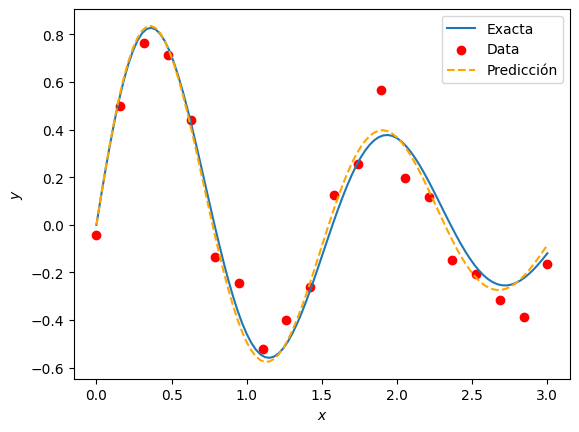

In [8]:
# 4.2)
w_ajust1 = [p.item() for p in w_torch]
y_ajust1_data = np.exp(-w_ajust1[0]*x_data)*np.sin(w_ajust1[1]*x_data)
y_ajust1_pred = np.exp(-w_ajust1[0]*x_exacta)*np.sin(w_ajust1[1]*x_exacta)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_exacta, y_exacta, label='Exacta')
plt.scatter(x_data, y_data, label='Data', c='r')
plt.plot(x_exacta, y_ajust1_pred, label='Predicción', linestyle='--', c='orange')
plt.legend()
plt.show()

## Ejercicio 5)

**1)** Repita el ejercicio anterior, pero ahora ajustando el modelo

$$
f(x,w) = \exp(-w_0x+w_2)\sin(w_1x+w_3)
$$

i.e. un modelo con dos parámetros ajustables extra.

**2)** Calcule el error cuadratico medio de ambos modelos, sobre los 30 puntos de entrenamiento y sobre los 300 puntos del la curva exacta.

In [ ]:
# 5.1)

lr = 1e-3
num_epochs = 5000

# Usando torch.optim
# Definir el optimizador, indicando el parámetro a optimizar y el learning rate
# optimizer = torch.optim.SGD(w, lr=0.001)
# Setemos en 0 los gradientes de todos los elementos
# optimizer.zero_grad()
# Actualizar los pesos
# optimizer.step()


w_ini = [p*(1+0.5*np.random.normal()) for p in w_exacta]
w_torch = [torch.tensor([p], requires_grad=True, dtype=torch.float) for p in w_ini + [0.1, 0.1]]
x_torch = torch.tensor(x_data)
y_torch = torch.tensor(y_data)

print(f'Inicial w_torch={[p.item() for p in w_torch]}')

for epoch in range(num_epochs): 
    f_torch = torch.exp(-w_torch[0]*x_torch+w_torch[2])*torch.sin(w_torch[1]*x_torch+w_torch[3])
    loss = ((f_torch - y_torch)**2).sum()

    loss.backward()

    if epoch%300==0:
        print(f'epoca={epoch}   loss={loss.item()}   w_torch={[p.item() for p in w_torch]}')

    with torch.no_grad():
        for p in w_torch:
            p -= lr*p.grad

    for p in w_torch:
        p.grad.zero_()

print(f'w_exacta={w_exacta}')   

Inicial w_torch=[0.25314322113990784, 6.532023906707764, 0.10000000149011612, 0.10000000149011612]
epoca=0   loss=8.402185463648816   w_torch=[0.25314322113990784, 6.532023906707764, 0.10000000149011612, 0.10000000149011612]
epoca=300   loss=2.7076784340778253   w_torch=[0.9367826581001282, 6.403059482574463, -0.46870869398117065, -0.25353336334228516]
epoca=600   loss=2.4495998272692705   w_torch=[1.1086281538009644, 6.274960517883301, -0.5208355784416199, -0.41437938809394836]
epoca=900   loss=2.3274741932613296   w_torch=[1.2085994482040405, 6.141726493835449, -0.5013260245323181, -0.5035684108734131]
epoca=1200   loss=2.23214504253838   w_torch=[1.272565245628357, 6.000502586364746, -0.4523911476135254, -0.5476440787315369]
epoca=1500   loss=2.1332565319653964   w_torch=[1.3120849132537842, 5.847352504730225, -0.3862970173358917, -0.5595357418060303]
epoca=1800   loss=2.0134432317092608   w_torch=[1.3310511112213135, 5.677185535430908, -0.30660775303840637, -0.5472443699836731]
epo

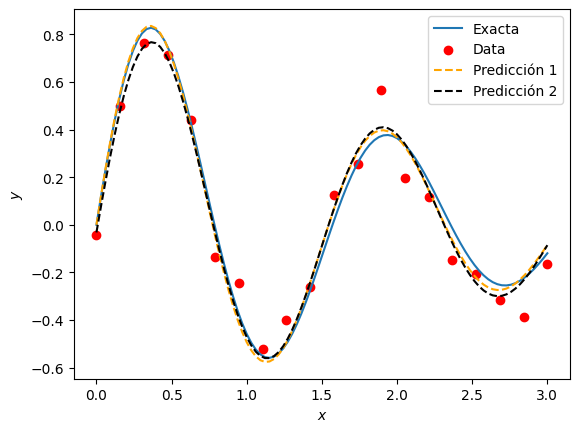

In [10]:
w_ajust2 = [p.item() for p in w_torch]
y_ajust2_data = np.exp(-w_ajust2[0]*x_data+w_ajust2[2])*np.sin(w_ajust2[1]*x_data+w_ajust2[3])
y_ajust2_pred = np.exp(-w_ajust2[0]*x_exacta+w_ajust2[2])*np.sin(w_ajust2[1]*x_exacta+w_ajust2[3])

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_exacta, y_exacta, label='Exacta')
plt.scatter(x_data, y_data, label='Data', c='r')
plt.plot(x_exacta, y_ajust1_pred, label='Predicción 1', linestyle='--', c='orange')
plt.plot(x_exacta, y_ajust2_pred, label='Predicción 2', linestyle='--', c='black')
plt.legend()
plt.show()

In [11]:
# 5.2)

((y_ajust1_data-y_data)**2).sum()

0.15726186515113963

In [12]:
((y_ajust1_pred-y_exacta)**2).sum()

0.0902864495609615

In [13]:
((y_ajust2_data-y_data)**2).sum()

0.13449743460764033

In [14]:
((y_ajust2_pred-y_exacta)**2).sum()

0.17572232065401347